In [123]:
import matplotlib.pyplot as pyplot
import numpy as np

In [132]:
timing  = np.genfromtxt('api_csv/bigLoad_u_5000_50s_5000_jaegerLookBack120/kaijuAPI.csv', delimiter=',', dtype='str')
t_start = np.array(timing[0:,0]).astype(np.int64)
t_end = np.array(timing[0:,1]).astype(np.int64)
n_spans = np.array(timing[0:,2]).astype(np.int64)
t_diff = np.subtract(t_end, t_start)
t_diff_sorted = np.sort(t_diff)

j_timing  = np.genfromtxt('api_csv/bigLoad_u_5000_50s_5000_jaegerLookBack120/jaegerAPI.csv', delimiter=',', dtype='str')
j_t_start = np.array(j_timing[0:,0]).astype(np.int64)
j_t_end = np.array(j_timing[0:,1]).astype(np.int64)
j_n_spans = np.array(j_timing[0:,2]).astype(np.int64)
j_t_diff = np.subtract(j_t_end, j_t_start)
j_t_diff_sorted = np.sort(j_t_diff)

In [133]:
print("Kaiju")
print("Num calls: " + str(t_start.shape[0]))
print("Num spans: " + str(np.amax(n_spans)))
print("Average latency: "+ str(np.mean(t_diff)))
print("Max latency: "+ str(np.amax(t_diff)))

print("Jaeger")
print("Num calls: " + str(j_t_start.shape[0]))
print("Num spans: " + str(np.amax(j_n_spans)))
print("Average latency: "+ str(np.mean(j_t_diff)))
print("Max latency: "+ str(np.amax(j_t_diff)))

Kaiju
Num calls: 308
Num spans: 246611
Average latency: 485558.564935
Max latency: 2073706
Jaeger
Num calls: 402
Num spans: 202302
Average latency: 495495.467662
Max latency: 1248334


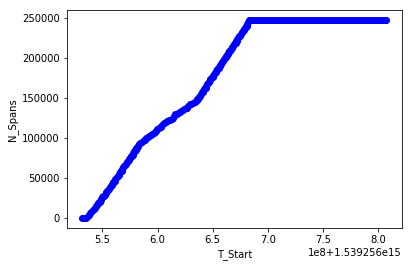

In [134]:
t_start_inds = t_start.argsort()
sortedByTStart_TStart = t_start[t_start_inds]
sortedByTStart_nSpans = n_spans[t_start_inds]

pyplot.scatter(sortedByTStart_TStart, sortedByTStart_nSpans, color='b')
pyplot.ylabel('N_Spans')
pyplot.xlabel('T_Start')
pyplot.show()

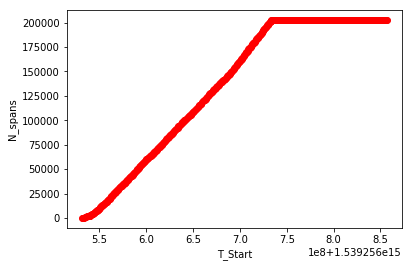

In [135]:
j_t_start_inds = j_t_start.argsort()
j_sortedByTStart_TStart = j_t_start[j_t_start_inds]
j_sortedByTStart_nSpans = j_n_spans[j_t_start_inds]

pyplot.scatter(j_sortedByTStart_TStart, j_sortedByTStart_nSpans, color='r')
pyplot.ylabel('N_spans')
pyplot.xlabel('T_Start')
pyplot.show()

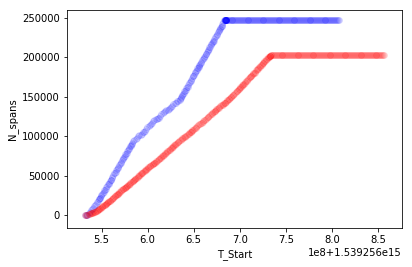

In [136]:
pyplot.scatter(sortedByTStart_TStart, sortedByTStart_nSpans, color='b', alpha=0.1)
pyplot.scatter(j_sortedByTStart_TStart, j_sortedByTStart_nSpans, color='r', alpha=0.1)
pyplot.ylabel('N_spans')
pyplot.xlabel('T_Start')
pyplot.show()

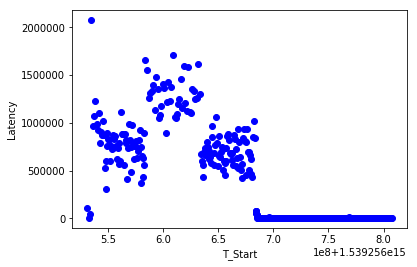

In [137]:
sortedByTStart_TDiff = t_diff[t_start_inds]
pyplot.scatter(sortedByTStart_TStart, sortedByTStart_TDiff, color='b')
pyplot.ylabel('Latency')
pyplot.xlabel('T_Start')
pyplot.show()

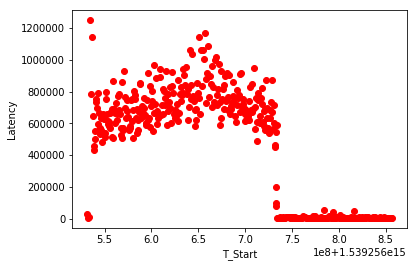

In [138]:
j_sortedByTStart_TDiff = j_t_diff[j_t_start_inds]
pyplot.scatter(j_sortedByTStart_TStart, j_sortedByTStart_TDiff, color='r')
pyplot.ylabel('Latency')
pyplot.xlabel('T_Start')
pyplot.show()
# On the right latencies while also inserting, left latencies only on read

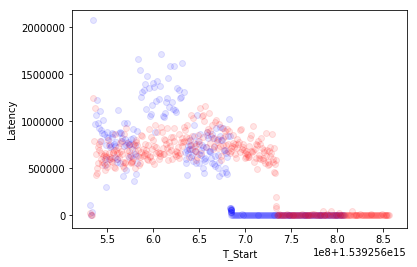

In [139]:
pyplot.scatter(sortedByTStart_TStart, sortedByTStart_TDiff, color='b', alpha=0.1)
pyplot.scatter(j_sortedByTStart_TStart, j_sortedByTStart_TDiff, color='r', alpha=0.1)
pyplot.ylabel('Latency')
pyplot.xlabel('T_Start')
pyplot.show()